In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

from keras import layers, optimizers, models
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Using TensorFlow backend.


In [2]:
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics



def printmd(string):
    display(Markdown(string))
    
    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [3]:
np.random.seed(7)

train_data = pandas.read_csv("adult.data", encoding="UTF-8", header=None)
test_data = pandas.read_csv("adult.test", encoding="UTF-8", header=None, skiprows=1)

# train_data = train_data[14].replace(' ', '').replace('.', '')
# test_data = test_data[14].replace(' ', '').replace('.', '')
train_data = train_data.replace(' ?', np.nan)
test_data = test_data.replace(' ?', np.nan)
train_data = train_data.dropna()
test_data = test_data.dropna()

def preprocessing(full_data):
    transform_needed = [False,
           True,
           False,
           True,
           False,
           True,
           True,
           True,
           True,
           True,
           False,
           False,
           False,
           True,
           True]


    def replaceSpaceAndDot(text: str):
        return text.replace(' ', '').replace('.', '')


    full_data[14] = full_data[14].apply(replaceSpaceAndDot)

    result = np.zeros(shape=(full_data.shape[0], full_data.shape[1]), dtype=np.float32)

    for i in range(len(transform_needed)):
        if transform_needed[i]:
            tmp_data = full_data.iloc[:, i].tolist()
            encoder = LabelEncoder()
            encoder.fit(tmp_data)
            result[:, i] = encoder.transform(tmp_data)
        else:
            result[:, i] = full_data.iloc[:, i].tolist()
            
    return result

In [4]:
trainingdata = preprocessing(train_data)
testingdata = preprocessing(test_data)

In [5]:
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(trainingdata)
data_norm= pandas.DataFrame(np_scaled)
trainingdata = data_norm.to_numpy()

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(testingdata)
data_norm= pandas.DataFrame(np_scaled)
testingdata = data_norm.to_numpy()

In [6]:
x_train = trainingdata[:, :13]
y_train = trainingdata[:, 14]

x_test = testingdata[:, :13]
y_test = testingdata[:, 14]

total_class = np.unique(trainingdata[:, 14]).shape[0]

Max depth:  1
Train Gini Accuracy: 0.7510775147536636
Test Gini Accuracy: 0.7543160690571049
Max depth:  2
Train Gini Accuracy: 0.821696173993767
Test Gini Accuracy: 0.8205179282868525
Max depth:  3
Train Gini Accuracy: 0.8359525230422385
Test Gini Accuracy: 0.8334661354581673
Max depth:  4
Train Gini Accuracy: 0.841190902460049
Test Gini Accuracy: 0.8388446215139442
Max depth:  5
Train Gini Accuracy: 0.8444068695709833
Test Gini Accuracy: 0.8389110225763612
Max depth:  6
Train Gini Accuracy: 0.8516676612956701
Test Gini Accuracy: 0.8424302788844622
Max depth:  7
Train Gini Accuracy: 0.8563755719116769
Test Gini Accuracy: 0.8395750332005312
Max depth:  8
Train Gini Accuracy: 0.8580664412174259
Test Gini Accuracy: 0.8434262948207172
Max depth:  9
Train Gini Accuracy: 0.8608182481267821
Test Gini Accuracy: 0.8393094289508632
Max depth:  10
Train Gini Accuracy: 0.8650951528413235
Test Gini Accuracy: 0.8375830013280212
Max depth:  11
Train Gini Accuracy: 0.8728532590677011
Test Gini Accura

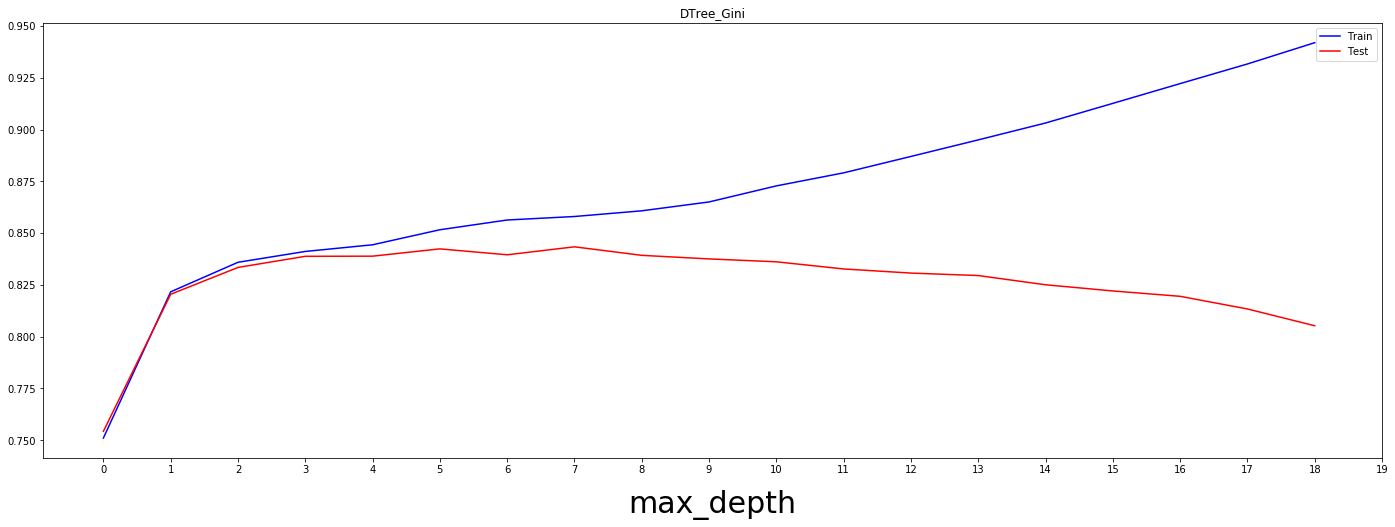

Best test Accuracy: 0.8434262948207172


Max depth:  1
Train Entropy Accuracy: 0.7510775147536636
Test Entropy Accuracy: 0.7543160690571049
Max depth:  2
Train Entropy Accuracy: 0.821696173993767
Test Entropy Accuracy: 0.8205179282868525
Max depth:  3
Train Entropy Accuracy: 0.8358862144420132
Test Entropy Accuracy: 0.8334661354581673
Max depth:  4
Train Entropy Accuracy: 0.8411577481599364
Test Entropy Accuracy: 0.8389774236387783
Max depth:  5
Train Entropy Accuracy: 0.8435780120681653
Test Entropy Accuracy: 0.8413014608233732
Max depth:  6
Train Entropy Accuracy: 0.8490484715867648
Test Entropy Accuracy: 0.8450863213811421
Max depth:  7
Train Entropy Accuracy: 0.8529606790000663
Test Entropy Accuracy: 0.8420318725099601
Max depth:  8
Train Entropy Accuracy: 0.855646177309197
Test Entropy Accuracy: 0.8443559096945551
Max depth:  9
Train Entropy Accuracy: 0.8584311385186659
Test Entropy Accuracy: 0.8399070385126162
Max depth:  10
Train Entropy Accuracy: 0.861912340030502
Test Entropy 

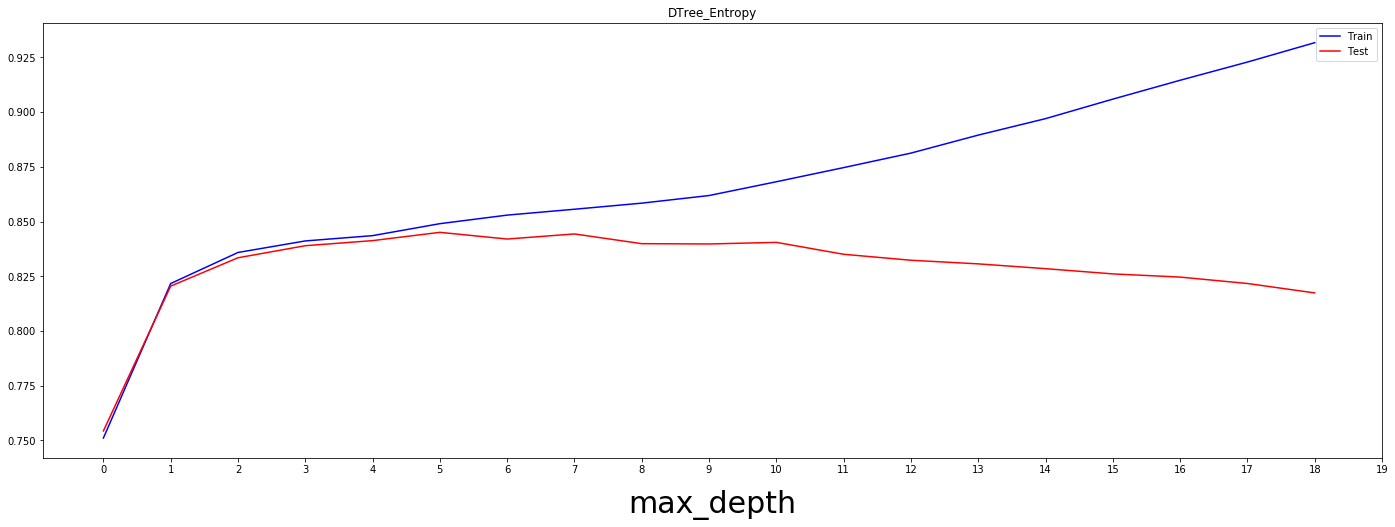

Best test Accuracy: 0.8450863213811421


In [13]:
# Gini
GList_train=[]
GList_test=[]
for max_depth in range(1, 20):
    clf_gini = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = max_depth)
    clf_gini = clf_gini.fit(x_train, y_train)
    
    print("Max depth: ",max_depth)
    clf_gini_pred = clf_gini.predict(x_train)
    train_acc = metrics.accuracy_score(y_train, clf_gini_pred)
    GList_train.append(train_acc)
    print("Train Gini Accuracy:",train_acc)
    
    clf_gini_pred = clf_gini.predict(x_test)
    test_acc = metrics.accuracy_score(y_test, clf_gini_pred)
    GList_test.append(test_acc)
    print("Test Gini Accuracy:",test_acc)

plt.figure(figsize=(24, 8))
orig = plt.plot(GList_train, color='blue',label='Train')
predict = plt.plot(GList_test, color='red',label='Test')
plt.xlabel("max_depth", fontsize=30, labelpad = 15)
plt.legend(loc='best')
plt.xticks(range(0,20))#十天一刻度
plt.title('DTree_Gini')
plt.show(block=False)
print('Best test Accuracy:',max(GList_test))
# DTree_Gini = model_eval(y_test, clf_gini_pred)
# print('Desicion Tree using Gini Index : %.2f percent.' % (round(DTree_Gini['accuracy']*100,2)))
print('\n')

# Entropy
EList_train=[]
EList_test=[]
for max_depth in range(1, 20):
    clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf_entropy = clf_entropy.fit(x_train, y_train)
    
    print("Max depth: ",max_depth)
    clf_entropy_pred = clf_entropy.predict(x_train)
    train_acc = metrics.accuracy_score(y_train, clf_entropy_pred)
    EList_train.append(train_acc)
    print("Train Entropy Accuracy:",train_acc)
    
    clf_entropy_pred = clf_entropy.predict(x_test)
    test_acc = metrics.accuracy_score(y_test, clf_entropy_pred)
    EList_test.append(test_acc)
    print("Test Entropy Accuracy:",test_acc)
    
plt.figure(figsize=(24, 8))
orig = plt.plot(EList_train, color='blue',label='Train')
predict = plt.plot(EList_test, color='red',label='Test')
plt.xlabel("max_depth", fontsize=30, labelpad = 15)
plt.legend(loc='best')
plt.xticks(range(0,20))#十天一刻度
plt.title('DTree_Entropy')
plt.show(block=False)
print('Best test Accuracy:',max(EList_test))

# DTree_Entropy = model_eval(y_test, clf_entropy_pred)
# print('Desicion Tree using Entropy : %.2f percent.' % (round(DTree_Entropy['accuracy']*100,2)))

#printmd('### 3.1.2. Model Evaulation ')
# ovl_dtree = round(pd.DataFrame([DTree_Entropy, DTree_Gini], index = ['DTree_Entropy','DTree_Gini']),4)
# display(ovl_dtree)

[Text(225.24053693420683, 212.004, 'X[7] <= 0.1\ngini = 0.374\nsamples = 30162\nvalue = [22654, 7508]'),
 Text(137.98149604261982, 201.132, 'X[4] <= 0.767\ngini = 0.496\nsamples = 12463\nvalue = [6784, 5679]'),
 Text(92.03089718291722, 190.26, 'X[10] <= 0.051\ngini = 0.447\nsamples = 8733\nvalue = [5792, 2941]'),
 Text(47.72341113955884, 179.388, 'X[4] <= 0.5\ngini = 0.422\nsamples = 8291\nvalue = [5785, 2506]'),
 Text(14.564824566719185, 168.516, 'X[11] <= 0.411\ngini = 0.191\nsamples = 1329\nvalue = [1187, 142]'),
 Text(8.61396860986547, 157.644, 'X[0] <= 0.267\ngini = 0.18\nsamples = 1300\nvalue = [1170, 130]'),
 Text(2.9499406132589985, 146.772, 'X[12] <= 0.49\ngini = 0.079\nsamples = 387\nvalue = [371, 16]'),
 Text(1.8421912495455095, 135.9, 'X[4] <= 0.433\ngini = 0.055\nsamples = 319\nvalue = [310, 9]'),
 Text(0.8277687553023876, 125.02799999999999, 'X[6] <= 0.077\ngini = 0.04\nsamples = 293\nvalue = [287, 6]'),
 Text(0.32461519815779905, 114.156, 'X[2] <= 0.13\ngini = 0.375\nsam

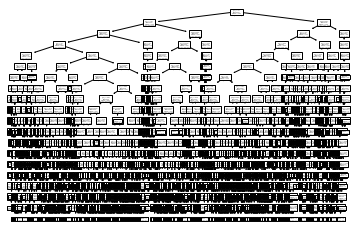

In [10]:
tree.plot_tree(clf_gini)

[Text(216.46072802744732, 212.004, 'X[7] <= 0.1\nentropy = 0.81\nsamples = 30162\nvalue = [22654, 7508]'),
 Text(126.41143830193568, 201.132, 'X[4] <= 0.767\nentropy = 0.994\nsamples = 12463\nvalue = [6784, 5679]'),
 Text(82.55877640320898, 190.26, 'X[10] <= 0.051\nentropy = 0.922\nsamples = 8733\nvalue = [5792, 2941]'),
 Text(39.62422034316525, 179.388, 'X[4] <= 0.433\nentropy = 0.884\nsamples = 8291\nvalue = [5785, 2506]'),
 Text(9.986799924955545, 168.516, 'X[0] <= 0.267\nentropy = 0.468\nsamples = 1242\nvalue = [1118, 124]'),
 Text(2.141077051079172, 157.644, 'X[12] <= 0.49\nentropy = 0.249\nsamples = 362\nvalue = [347, 15]'),
 Text(1.4856453007488133, 146.772, 'X[11] <= 0.408\nentropy = 0.178\nsamples = 299\nvalue = [291, 8]'),
 Text(1.0486908005285742, 135.9, 'X[6] <= 0.192\nentropy = 0.144\nsamples = 293\nvalue = [287, 6]'),
 Text(0.6991272003523827, 125.02799999999999, 'X[8] <= 0.625\nentropy = 0.27\nsamples = 108\nvalue = [103, 5]'),
 Text(0.5243454002642871, 114.156, 'entropy

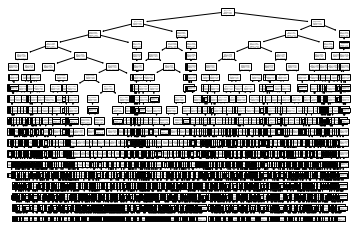

In [11]:
tree.plot_tree(clf_entropy)

In [18]:
y_test = pandas.DataFrame(clf_entropy_pred)
y_test.to_csv(r'y_test_Adult.csv', index = False)

In [17]:
clf_entropy_pred = pandas.DataFrame(clf_entropy_pred)
clf_entropy_pred

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
15055,0.0
15056,0.0
15057,1.0
15058,0.0


In [19]:
clf_entropy_pred.to_csv(r'clf_entropy_pred_Adult.csv', index = False)

In [ ]:
#測試決策樹、取得正確率並輸出成dot檔案
# data_predicted = dtc.predict(test_X)
import pydotplus
import collections
from IPython.display import Image  
from sklearn.tree import export_graphviz
with open("tree.dot" , 'w') as f:
    f = export_graphviz(clf_entropy, out_file = f)
data_feature_names = [ 'buying', 'maint', 'doors','persons','lug_boot' ,'class']
class_names = ['v-good','good','acc','unacc']

In [ ]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
import graphviz 

dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                     feature_names=data_feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("Adult_entropy_tree") 

#dot_data = tree.export_graphviz(clf_entropy,feature_names=data_feature_names)
#graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png('entropy_tree.png')    #保存图像
#Image(graph.create_png())